### Preamble

In [2]:
import $ivy.`org.scalatest::scalatest:3.2.16`
import org.scalatest.{Filter => _, _}, flatspec._, matchers._

import $ivy.$                                

import org.scalatest.{Filter => _, _}, flatspec._, matchers._


In [3]:
trait Isomorphic[A, B]{
    
    def from(a: A): B
    
    def to(b: B): A
    
    // equality 
    
    def equalA(a1: A, a2: A): Boolean = 
        a1 == a2
    
    def equalB(b1: B, b2: B): Boolean =
        b1 == b2
    
    // Bijection laws
    
    def law1(a: A): Boolean = 
        equalA(to(from(a)), a)
    
    def law2(b: B): Boolean = 
        equalB(from(to(b)), b)
}

defined trait Isomorphic

In [4]:
class TestIso[A, B](iso: Isomorphic[A, B])(a: A*)(b: B*)  extends AnyFlatSpec with should.Matchers:
    import iso._

    "law1" should "hold" in:
        a.forall(law1) should be(true)

    "law2" should "hold" in:
        b.forall(law2) should be(true)

defined class TestIso

# Topic 3. Algebraic data types


## 3.4 Isomorphisms

## Exercise 1

### Part a)

Prove that the isomorphism $Either[Unit, Unit] \cong Boolean$ holds by implementing the following bijections: 

In [ ]:
object Iso1a extends Isomorphic[Boolean, Either[Unit, Unit]]:

    def from(a: Boolean): Either[Unit, Unit] = 
        ???    
    
    def to(a: Either[Unit, Unit]): Boolean = 
        ???

Check that they are indeed mutual inverses, i.e. that for all $a: Boolean$, `toBoolean(fromBoolean(a))==a`, and that for all $a: Either[Unit, Unit]$, `fromBoolean(toBoolean(a))==a`.

#### Solution

In [ ]:
object Iso1a extends Isomorphic[Boolean, Either[Unit, Unit]]:

    def from(a: Boolean): Either[Unit, Unit] = 
        if a then Right(()) 
        else Left(())    
    
    def to(a: Either[Unit, Unit]): Boolean = 
        a match
            case Left(_) => false
            case Right(_) => true

In [ ]:
run(TestIso(Iso1a)
           (false, true)
           (Left(()), Right(())))

#### Your solution

### Part b)

Show that we can redefine `Option[A]` using `Either[A,Unit]` by implementing the following isomorphism: 

In [ ]:
class Iso1b[A] extends Isomorphic[Option[A], Either[A, Unit]]:
    // ... 

Check that these functions are mutual inverses. For that, fix $A$ to particular types (e.g. `Boolean`, `Int`, etc.), and test the equivalences `from(to(e)) == e` and `to(from(o)) == o` for some values $o$ and $e$.

#### Solution

In [ ]:
class Iso1b[A] extends Isomorphic[Option[A], Either[A, Unit]]:
    
    def from(o: Option[A]): Either[A, Unit] = 
        o match
            case None => Right(())
            case Some(a) => Left(a)

    def to(e: Either[A, Unit]): Option[A] = 
        e match
            case Left(a) => Some(a)
            case Right(()) => None

In [ ]:
run(TestIso(Iso1b[Boolean])
           (None, Some(true))
           (Left(false), Left(true), Right(())))

#### Your solution

## Exercise 2

How many functions are there of type `Either[Unit, Either[Unit, Unit]] => Boolean`? Identify all of them as alternative implementations of the following signature: 

In [ ]:
def f1(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => ??? 
    case Right(Left(())) => ??? 
    case Right(Right(())) => ??? 

Idem, as alternative lambda expressions:

In [ ]:
val f1: Either[Unit, Either[Unit, Unit]] => Boolean = 
    ???

#### Solution

In [ ]:
def f1(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => false 
    case Right(Left(())) => false 
    case Right(Right(())) => false 

In [ ]:
def f2(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => true 
    case Right(Left(())) => false 
    case Right(Right(())) => false 

In [ ]:
def f3(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => false
    case Right(Left(())) => true
    case Right(Right(())) => false 

In [ ]:
def f4(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => true 
    case Right(Left(())) => true
    case Right(Right(())) => false 

In [ ]:
def f5(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => false 
    case Right(Left(())) => false 
    case Right(Right(())) => true 

In [ ]:
def f6(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => true 
    case Right(Left(())) => false 
    case Right(Right(())) => true 

In [ ]:
def f7(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => false
    case Right(Left(())) => true
    case Right(Right(())) => true 

In [ ]:
def f8(e: Either[Unit, Either[Unit, Unit]]): Boolean = e match
    case Left(()) => true 
    case Right(Left(())) => true
    case Right(Right(())) => true 

With lambda expressions: 

In [ ]:
val f8: Either[Unit, Either[Unit, Unit]] => Boolean =
    case Left(()) => true 
    case Right(Left(())) => true
    case Right(Right(())) => true 

etc.

#### Your solution

## Exercise 3

How many different implementations are there of the following function? Recall that two implementations will be considered different if the corresponding mathematical functions are different.

In [ ]:
def f1(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    ???

#### Solution

In [ ]:
def f1(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    Left(())

def f2(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    Right(Left(()))

def f3(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    Right(Right(()))

def f4(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    if b then Left(()) else Right(Left(()))

def f5(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    if b then Right(Left(())) else Right(Right(()))

def f6(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    if b then Left(()) else Right(Right(()))

def f7(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    if !b then Left(()) else Right(Left(()))

def f8(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    if !b then Right(Left(())) else Right(Right(()))

def f9(b: Boolean): Either[Unit, Either[Unit, Unit]] = 
    if !b then Left(()) else Right(Right(()))


#### Your solution

## Exercise 4

Show that the following isomorphism holds for exponent types: $X => (Y => Z) \cong ((Y, X)) => Z$, for all types $X$, $Y$ and $Z$.

In [ ]:
class Iso[X, Y, Z] extends Isomorphic[X => (Y => Z), ((Y, X)) => Z]
    // ... 

Implement function equality for the corresponding signatures and check that both functions, `curry` and `uncurry`, are inverses of each other for two sample functions $ex1$ and $ex2$:  

In [ ]:
def ex1: Boolean => Boolean => Boolean = b1 => b2 => false

def ex2: ((Boolean, Boolean)) => Boolean = (b1, b2) => true

#### Solution

In [ ]:
class Iso[X, Y, Z] extends Isomorphic[X => (Y => Z), ((Y, X)) => Z]:
    
    // uncurry
    def from(f: X => Y => Z): ((Y, X)) => Z = 
        (y, x) => f(x)(y)
 
    // curry
    def to(f: ((Y, X)) => Z): X => Y => Z = 
        x => y => f(y, x)


In [ ]:
object Iso1 extends Iso[Boolean, Boolean, Boolean]:
    
    override def equalA(f1: Boolean => Boolean => Boolean, 
               f2: Boolean => Boolean => Boolean): Boolean = 
        f1(false)(false) == f2(false)(false) &&
        f1(false)(true) == f2(false)(true) &&
        f1(true)(false) == f2(true)(false) &&
        f1(true)(true) == f2(true)(true)
    
    override def equalB(f1: ((Boolean, Boolean)) => Boolean, 
               f2: ((Boolean, Boolean)) => Boolean): Boolean = 
        f1(false,false) == f2(false,false) &&
        f1(false,true) == f2(false,true) &&
        f1(true,false) == f2(true,false) &&
        f1(true,true) == f2(true,true)

In [ ]:
run(TestIso(Iso1)(ex1)(ex2))

#### Your solution

## Exercise 5

Shows that the following law holds for exponent types: $X => (Y, Z) \cong (X => Y, X => Z)$, for all types $X$, $Y$ and $Z$.

In [36]:
class Iso[X, Y, Z] extends Isomorphic[X => (Y, Z), (X => Y, X => Z)] : 

    def from(f: X => (Y, Z)): (X => Y, X => Z) = 
        ??? 

    def to(t: (X => Y, X => Z)): X => (Y, Z) = 
        x => (t._1(x), t._2(x))

defined class Iso

|A => B| = |B|*|B|* ...*|B|= |B|^|A|

// |X => (Y, Z)| = |(Y, Z)|^|X| = (|Y|*|Z|)^|X| = |Y|^|X| * |Z|^|X| = 
    = |X => Y| * |X => Z| = |(X => Y, X => Z)|

In [28]:
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    ??? : (X => Y, X => Z)

defined function from

In [29]:
// Constructor (tuplas)
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    (??? : X => Y, ??? : X => Z) : (X => Y, X => Z)

defined function from

In [29]:
// Constructor (tuplas)
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    (??? : X => Y, ??? : X => Z)

defined function from

In [30]:
// Constructor (functions)
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    ((x: X) => ??? : Y, (x: X) => ??? : Z)

defined function from

In [32]:
// Destructor (functions)
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    ((x: X) => 
         val t: (Y, Z) = f(x)
         ??? : Y, 
     (x: X) => 
         val t: (Y, Z) = f(x)
         ??? : Z)

defined function from

In [33]:
// Destructor (tuplas)
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    ((x: X) => 
         val t: (Y, Z) = f(x)
         t._1 : Y, 
     (x: X) => 
         val t: (Y, Z) = f(x)
         t._2 : Z)

defined function from

In [34]:
// Destructor (tuplas)
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    (x => f(x)._1, x => f(x)._2)

defined function from

In [35]:
// Destructor (tuplas)
def from[X, Y, Z](f: X => (Y, Z)): (X => Y, X => Z) = 
    (f(_)._1, f(_)._2)

defined function from

In [37]:
def to[X, Y, Z](t: (X => Y, X => Z)): X => (Y, Z) = 
    ??? : (X => (Y, Z))

defined function to

In [38]:
// Constructor (Functions)
def to[X, Y, Z](t: (X => Y, X => Z)): X => (Y, Z) = 
    (x: X) => ??? : (Y, Z)

defined function to

In [42]:
// Constructor (tuplas)
def to[X, Y, Z](t: (X => Y, X => Z)): X => (Y, Z) = 
    (x: X) => (???: Y, ??? : Z)

(console)
-- [E040] Syntax Error: <splitter>:3:20 ----------------------------------------
3 |    (x: X) => (???: Y, ??? : Z)
  |                    ^
  |                    ',' or ')' expected, but identifier found

In [39]:
// Destructor (producto)
def to[X, Y, Z](t: (X => Y, X => Z)): X => (Y, Z) = 
    (x: X) => 
        val f: X => Y = t._1
        val g: X => Z = t._2
        (??? : Y, ??? : Z)

defined function to

In [41]:
// Destructor (functions)
def to[X, Y, Z](t: (X => Y, X => Z)): X => (Y, Z) = 
    (x: X) => 
        val f: X => Y = t._1
        val g: X => Z = t._2
        (f(x) : Y, g(x) : Z)

defined function to

In [42]:
// Destructor (functions)
def to[X, Y, Z](t: (X => Y, X => Z)): X => (Y, Z) = 
    x => (t._1(x), t._2(x))

defined function to

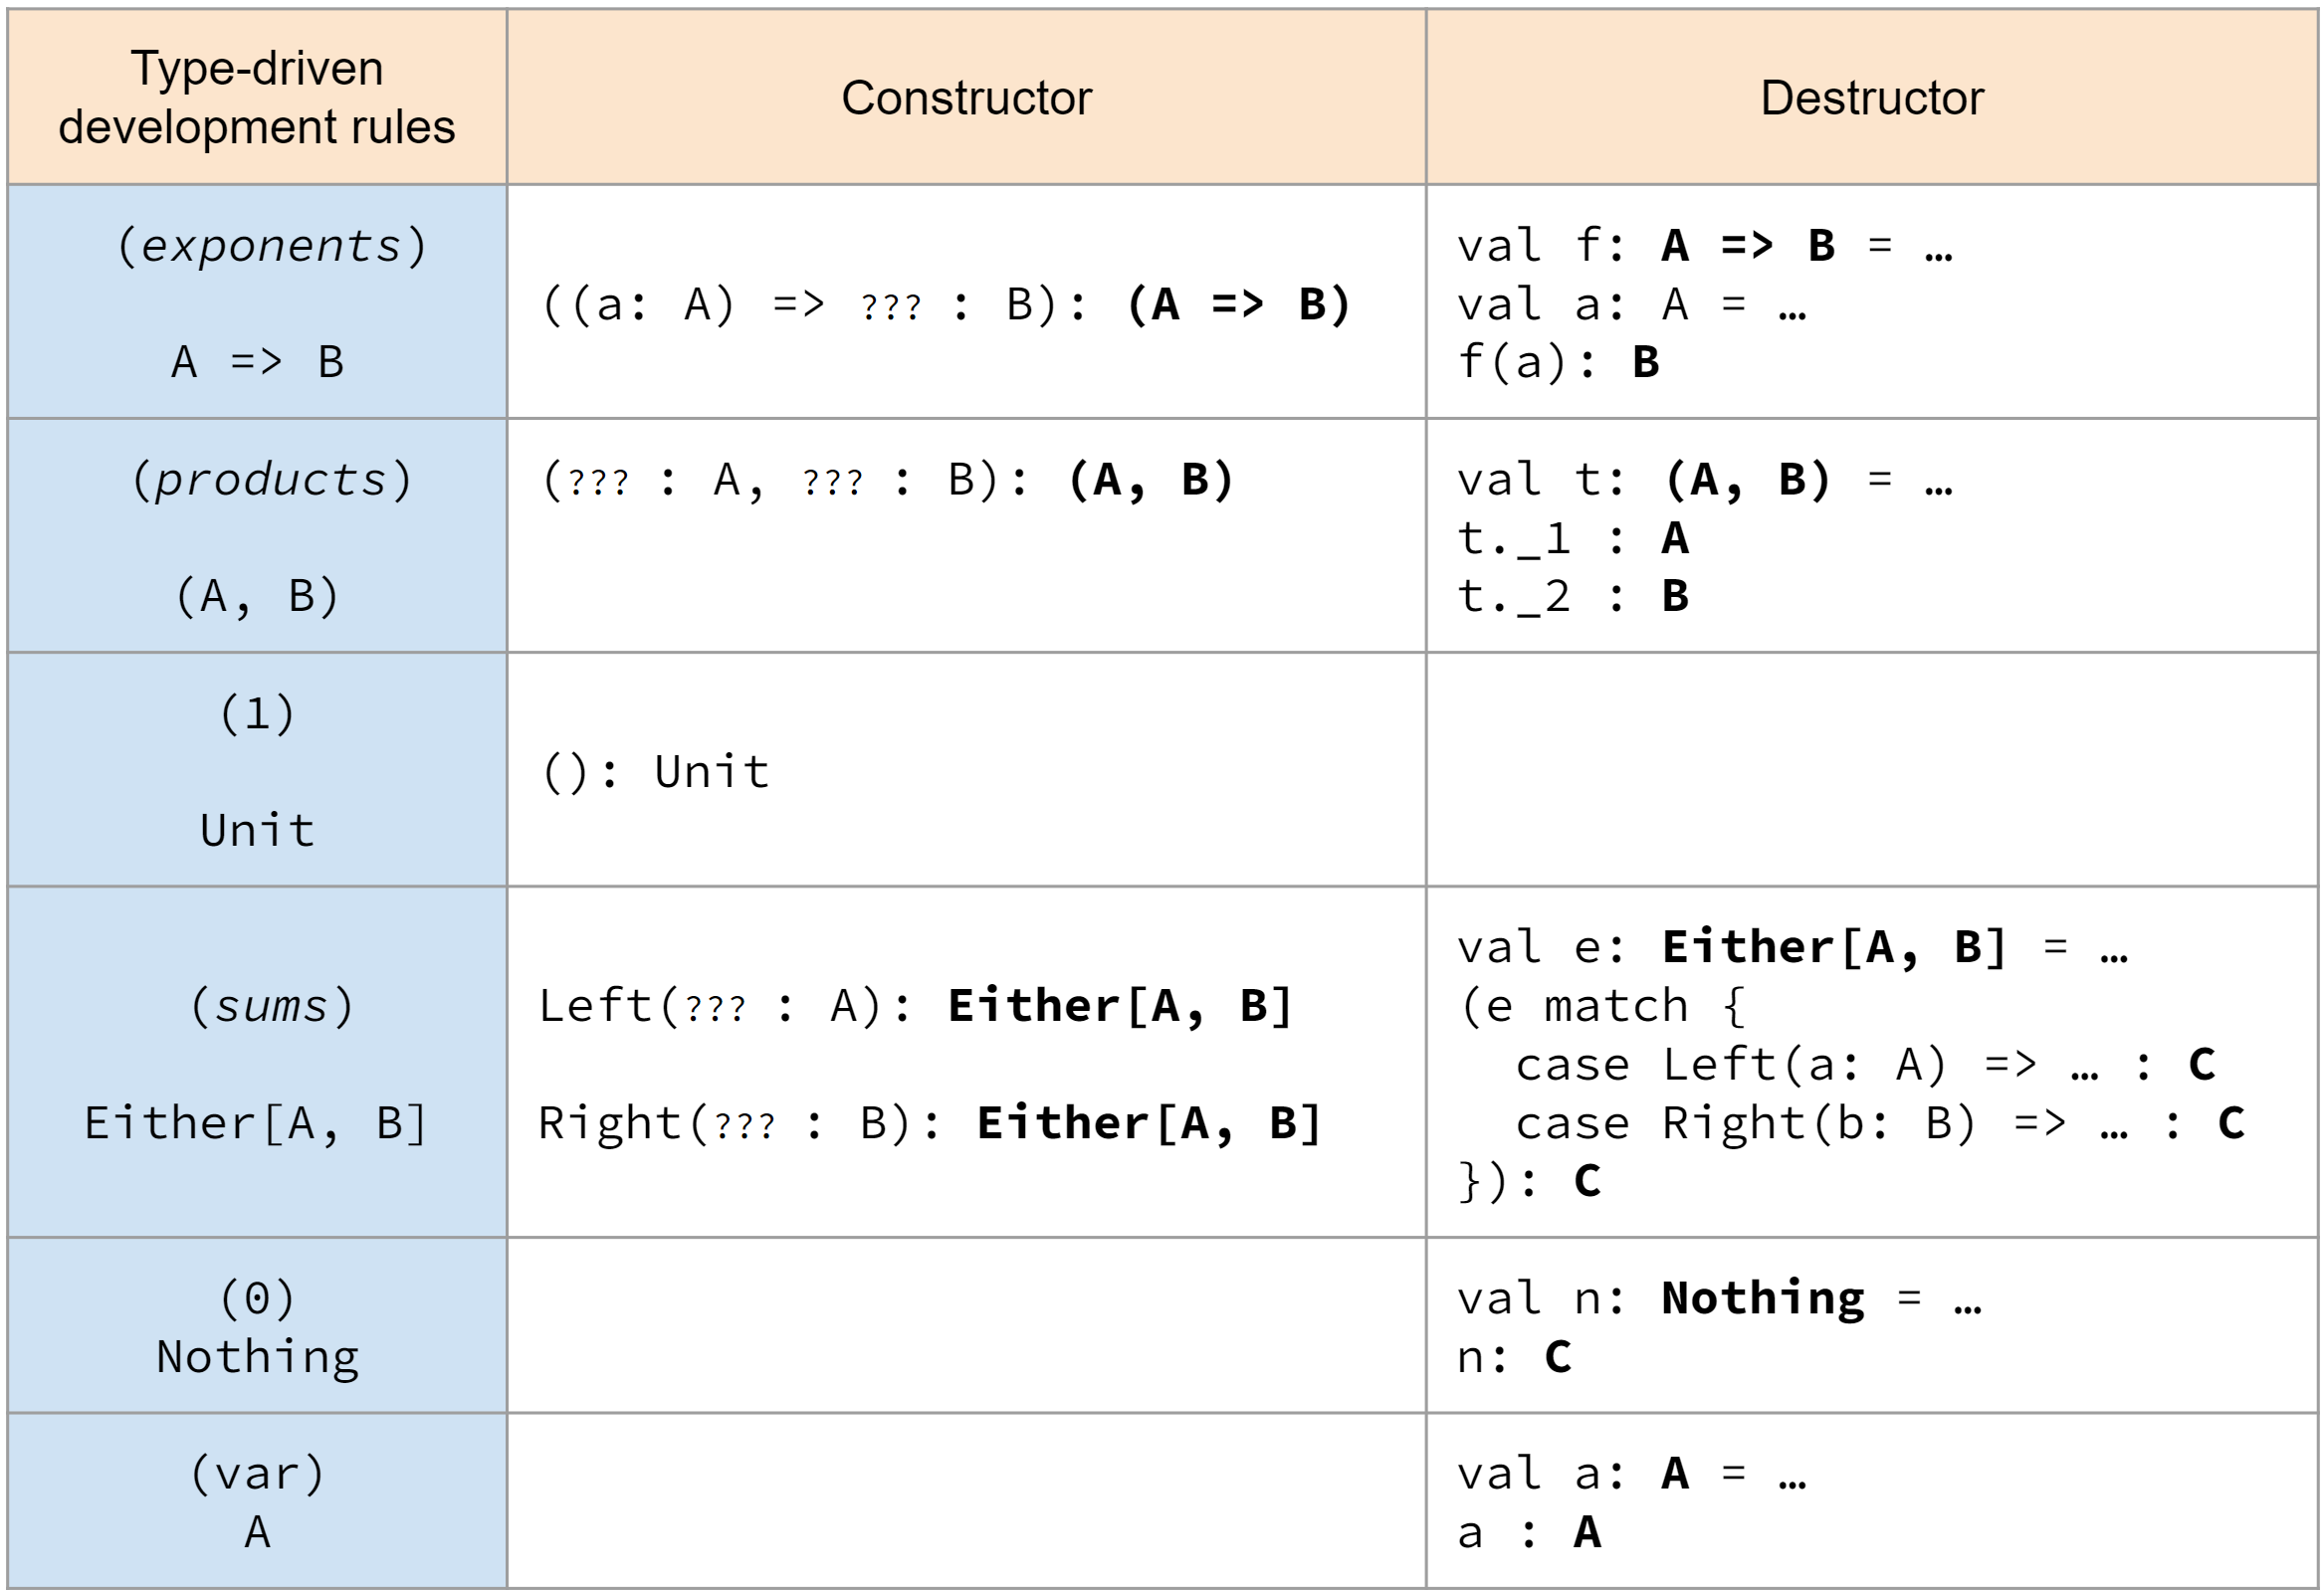

Fix $X$, $Y$ and $Z$ to particular types, implement equality for the corresponding signatures and check that both functions, `from` and `to`, are inverses of each other given two sample functions of your choice.  

#### Solution

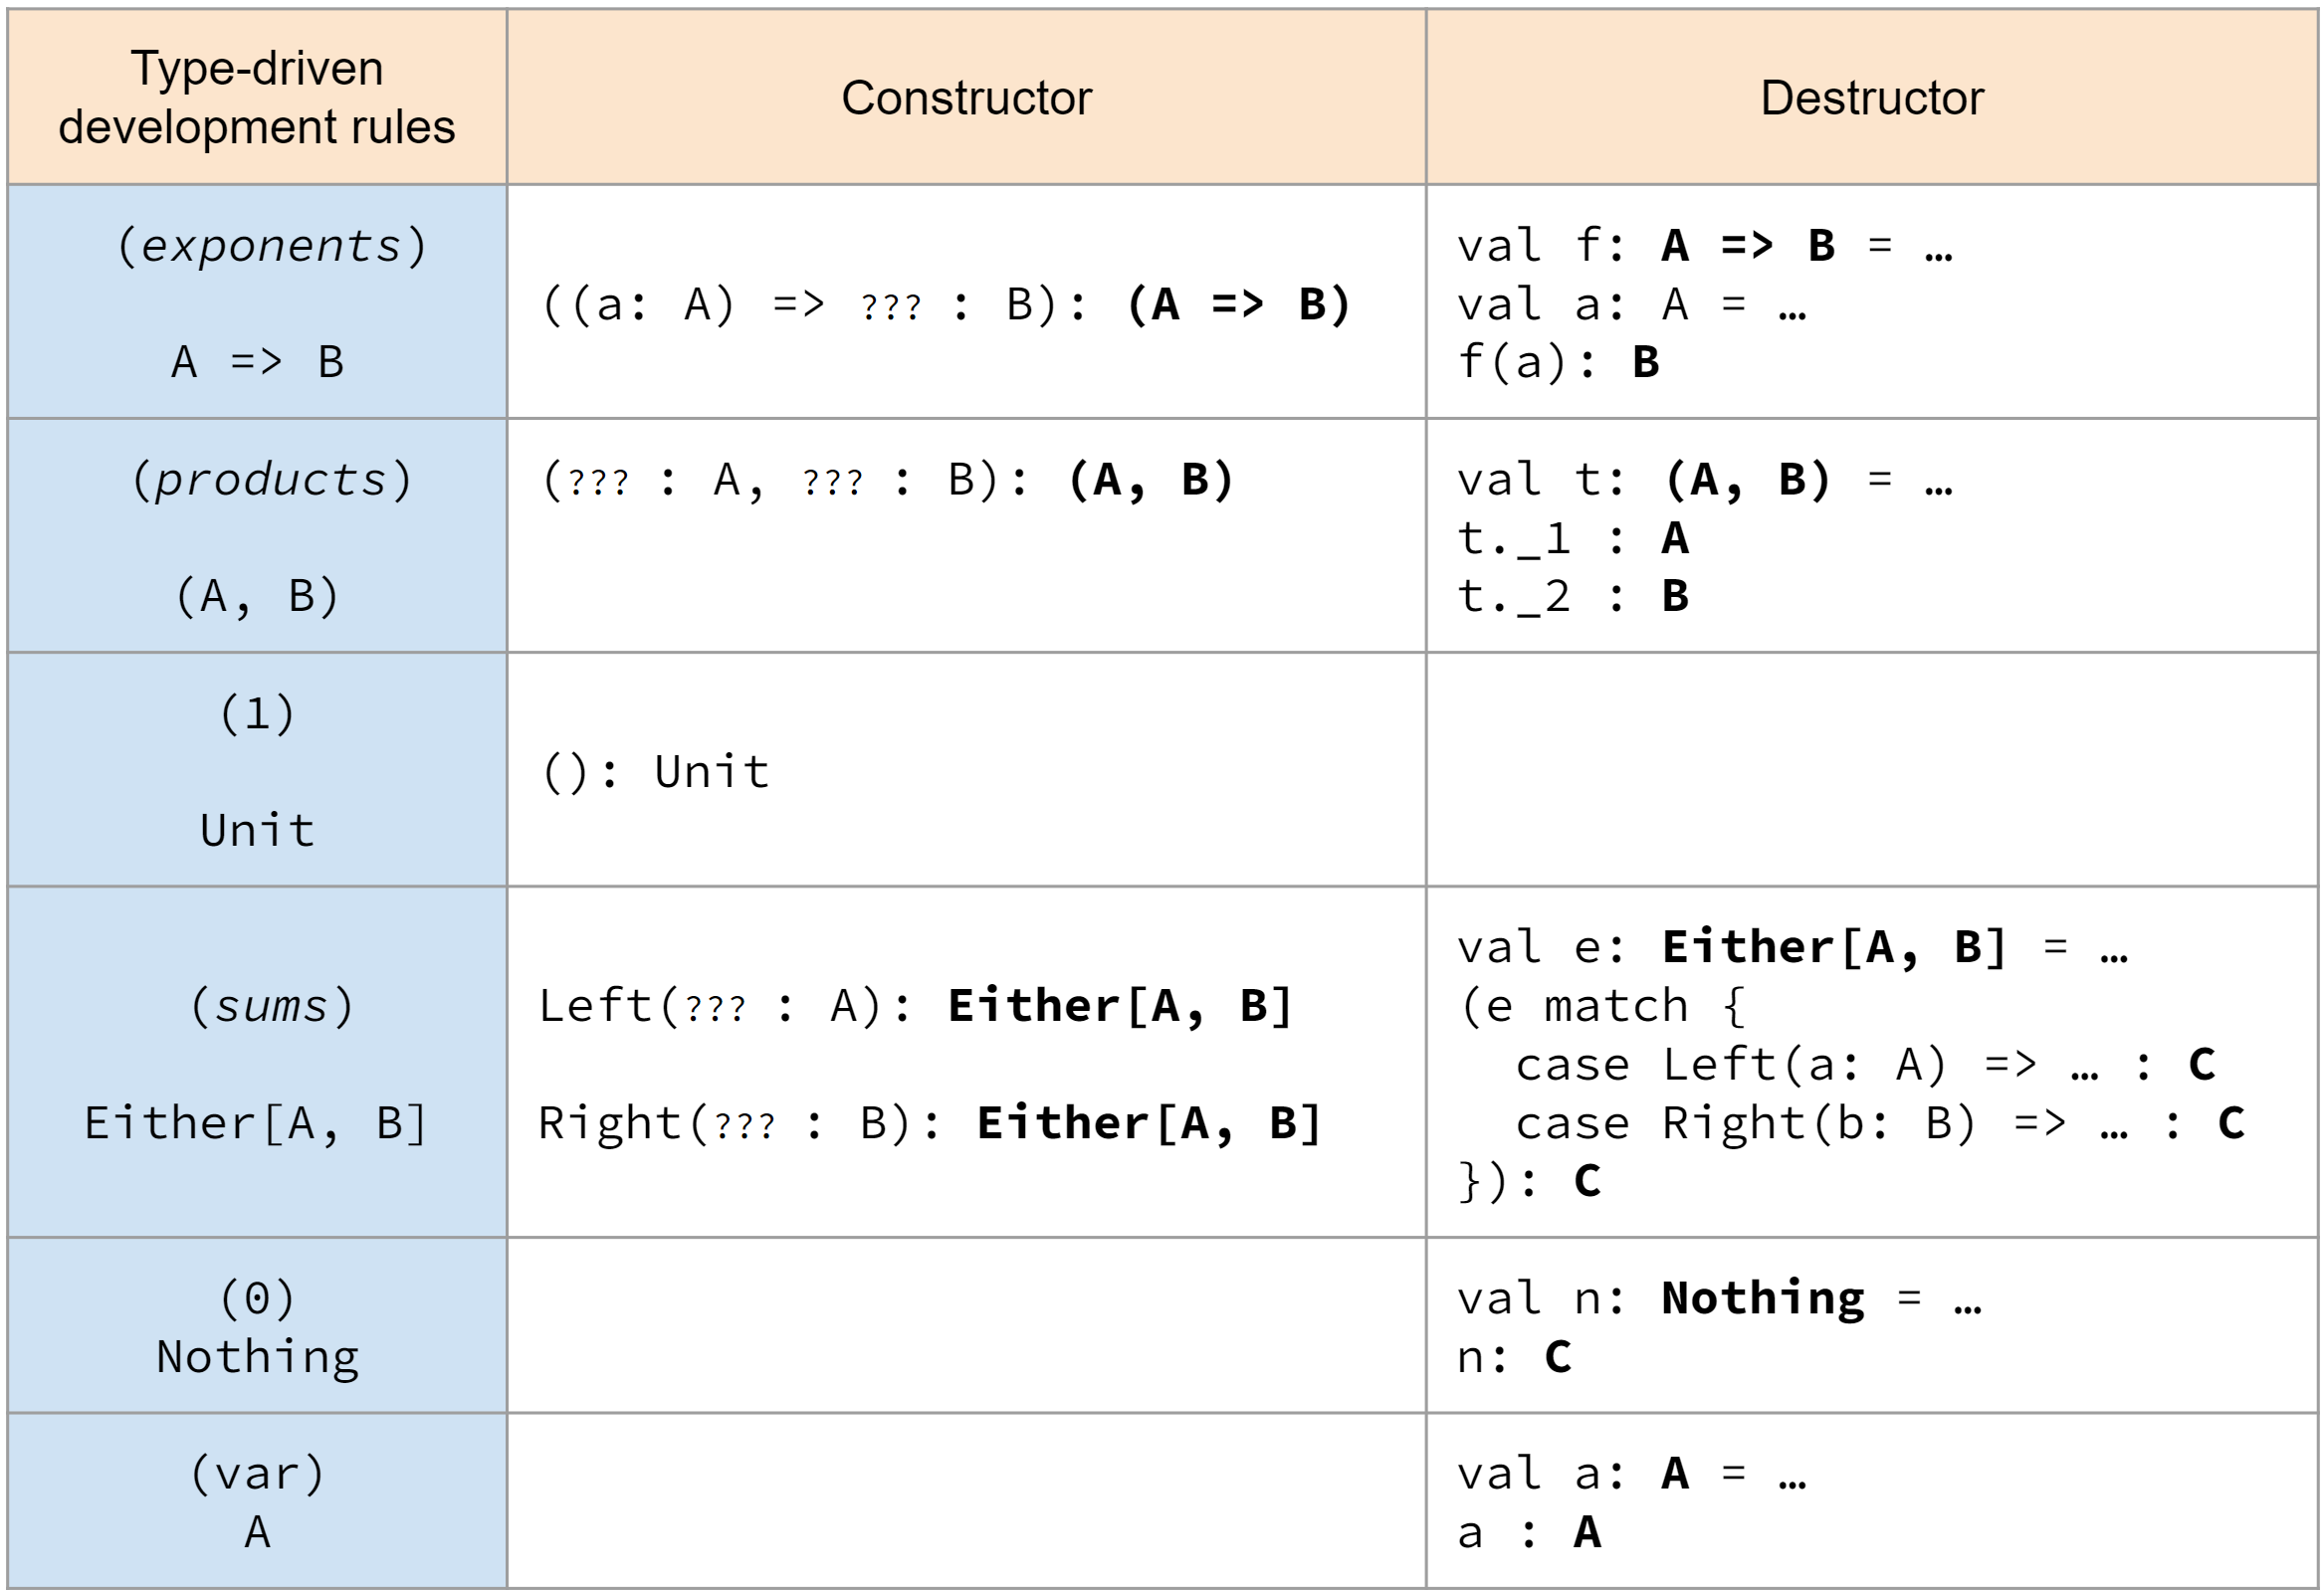

In [ ]:
class Iso[X, Y, Z] extends Isomorphic[X => (Y, Z), (X => Y, X => Z)]:
    
    def from(f: X => (Y, Z)): (X => Y, X => Z) = 
        (x => f(x)._1, x => f(x)._2)

    def to(t: (X => Y, X => Z)): X => (Y, Z) = t match
        case (f1, f2) => x => (f1(x), f2(x))

In [ ]:
object Iso1 extends Iso[Boolean, Boolean, Boolean]:
    
    def equalAux(f1: Boolean => Boolean, f2: Boolean => Boolean): Boolean = 
        f1(false) == f2(false) && 
        f1(true) == f2(true)
    
    override def equalA(f1: Boolean => (Boolean, Boolean), f2: Boolean => (Boolean, Boolean)): Boolean = 
        f1(false) == f2(false) && 
        f1(true) == f2(true)
    
    override def equalB(f1: (Boolean => Boolean, Boolean => Boolean), 
                        f2: (Boolean => Boolean, Boolean => Boolean)): Boolean = 
        equalAux(f1._1, f2._1) && equalAux(f1._2, f2._2)

In [ ]:
val ex1: Boolean => (Boolean, Boolean) = 
    _ => (false, false)

val ex2: (Boolean => Boolean, Boolean => Boolean) = 
    (_ => true, ! _)

In [ ]:
run(TestIso(Iso1)(ex1)(ex2))

#### Your solution

## Exercise 6

Shows that the following isomorphisms holds for algebraic data types:

$$ 
\begin{array}{rcl}
Either[X,Nothing] & \cong & X \\
\end{array}
$$



In [ ]:
// extends trait Isomorphic

$$ 
\begin{array}{rcl}
Either[X,Y] & \cong & Either[Y,X] \\
\end{array}
$$



In [ ]:
// extends trait Isomorphic

$$ 
\begin{array}{rcl}
Either[X,Either[Y,Z]] & \cong & Either[Either[X,Y],Z] \\
\end{array}
$$



// |Either[X, Either[Y, Z]]|  
//    = |X| + |Either[Y, Z]|
//    = |X| + (|Y|+|Z|)
//    = (|X|+|Y|)+|Z|
//    = |Either[X, Y]|+|Z|
//    = |Either[Either[X, Y], Z]|

In [25]:
class Iso[X, Y, Z] extends Isomorphic[Either[X, Either[Y, Z]],
                                      Either[Either[X, Y], Z]]: 

    def from(x: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
        x match 
            case Left(x) => 
                Left(Left(x))
            case Right(Left(y)) => 
                Left(Right(y))
            case Right(Right(z)) => 
                Right(z)

    def to(y: Either[Either[X, Y], Z]): Either[X, Either[Y, Z]] = 
        y match 
            case Left(Left(x)) => Left(x)
            case Left(Right(y)) => Right(Left(y))
            case Right(z) => Right(Right(z))

defined class Iso

In [6]:
def from[X, Y, Z](x: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    ??? : Either[Either[X, Y], Z]

defined function from

In [7]:
// Constructor (Either)
def from[X, Y, Z](x: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    Left(??? : Either[X, Y]) : Either[Either[X, Y], Z]

defined function from

In [7]:
def from[X, Y, Z](x: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    Left(??? : Either[X, Y])

defined function from

In [8]:
def from[X, Y, Z](x: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    Left(Left(??? : X) : Either[X, Y]) : Either[Either[X, Y], Z]

defined function from

In [9]:
// Destructor (Either)
def from[X, Y, Z](x: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    x match 
        case Left(x: X) => 
            Left(Left(??? : X) : Either[X, Y]) : Either[Either[X, Y], Z]
        case Right(e: Either[Y, Z]) => 
            Left(Left(??? : X) : Either[X, Y]) : Either[Either[X, Y], Z]

defined function from

In [10]:
def from[X, Y, Z](e: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    e match 
        case Left(x: X) => 
            Left(Left(x : X) : Either[X, Y]) : Either[Either[X, Y], Z]
        case Right(e2: Either[Y, Z]) => 
            Left(Left(??? : X) : Either[X, Y]) : Either[Either[X, Y], Z]

defined function from

In [11]:
def from[X, Y, Z](e: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    e match 
        case Left(x: X) => 
            Left(Left(x : X) : Either[X, Y]) : Either[Either[X, Y], Z]
        case Right(e2: Either[Y, Z]) => 
            ??? : Either[Either[X, Y], Z]

defined function from

In [12]:
def from[X, Y, Z](e: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    e match 
        case Left(x: X) => 
            Left(Left(x : X) : Either[X, Y]) : Either[Either[X, Y], Z]
        case Right(e2: Either[Y, Z]) => 
            e2 match 
                case Left(y: Y) => 
                    ??? : Either[Either[X, Y], Z]
                case Right(z: Z) => 
                    ??? : Either[Either[X, Y], Z]

defined function from

In [20]:
val e1: Either[Int, Boolean] = Left(1)
val e2: Either[Int, Boolean] = Right(true)
val e3: Either[Either[Int, Boolean], Char] = Right('a'): Either[Either[Int, Boolean], Char]
lazy val e4: Either[Either[Int, Boolean], Char] = Left(??? : Either[Int, Boolean]): Either[Either[Int, Boolean], Char]
lazy val e5: Either[Either[Int, Boolean], Char] = Left(Right(false))

e1: Either[Int, Boolean] = Left(value = 1)
e2: Either[Int, Boolean] = Right(value = true)
e3: Either[Either[Int, Boolean], Char] = Right(value = 'a')
e4: Either[Either[Int, Boolean], Char] = <lazy>
e5: Either[Either[Int, Boolean], Char] = <lazy>

In [18]:
def from[X, Y, Z](e: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    e match 
        case Left(x: X) => 
            Left(Left(x : X): Either[X, Y]) : Either[Either[X, Y], Z]
        case Right(e2: Either[Y, Z]) => 
            e2 match 
                case Left(y: Y) => 
                    Left(Right(y: Y): Either[X, Y]) : Either[Either[X, Y], Z]
                case Right(z: Z) => 
                    Right(z: Z) : Either[Either[X, Y], Z]

defined function from

In [21]:
def from[X, Y, Z](e: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    e match 
        case Left(x) => 
            Left(Left(x))
        case Right(e2) => 
            e2 match 
                case Left(y) => 
                    Left(Right(y))
                case Right(z) => 
                    Right(z)

defined function from

In [21]:
def from[X, Y, Z](e: Either[X, Either[Y, Z]]): Either[Either[X, Y], Z] = 
    e match 
        case Left(x) => 
            Left(Left(x))
        case Right(Left(y)) => 
            Left(Right(y))
        case Right(Right(z)) => 
            Right(z)

defined function from

In [23]:
def to[X, Y, Z](e: Either[Either[X, Y], Z]): Either[X, Either[Y, Z]] = 
    e match 
        case Left(Left(x)) => ??? : Either[X, Either[Y, Z]]
        case Left(Right(y)) => ??? : Either[X, Either[Y, Z]]
        case Right(z) => ??? : Either[X, Either[Y, Z]]

defined function to

In [24]:
def to[X, Y, Z](e: Either[Either[X, Y], Z]): Either[X, Either[Y, Z]] = 
    e match 
        case Left(Left(x)) => Left(x) : Either[X, Either[Y, Z]]
        case Left(Right(y)) => Right(Left(y)) : Either[X, Either[Y, Z]]
        case Right(z) => Right(Right(z)) : Either[X, Either[Y, Z]]

defined function to

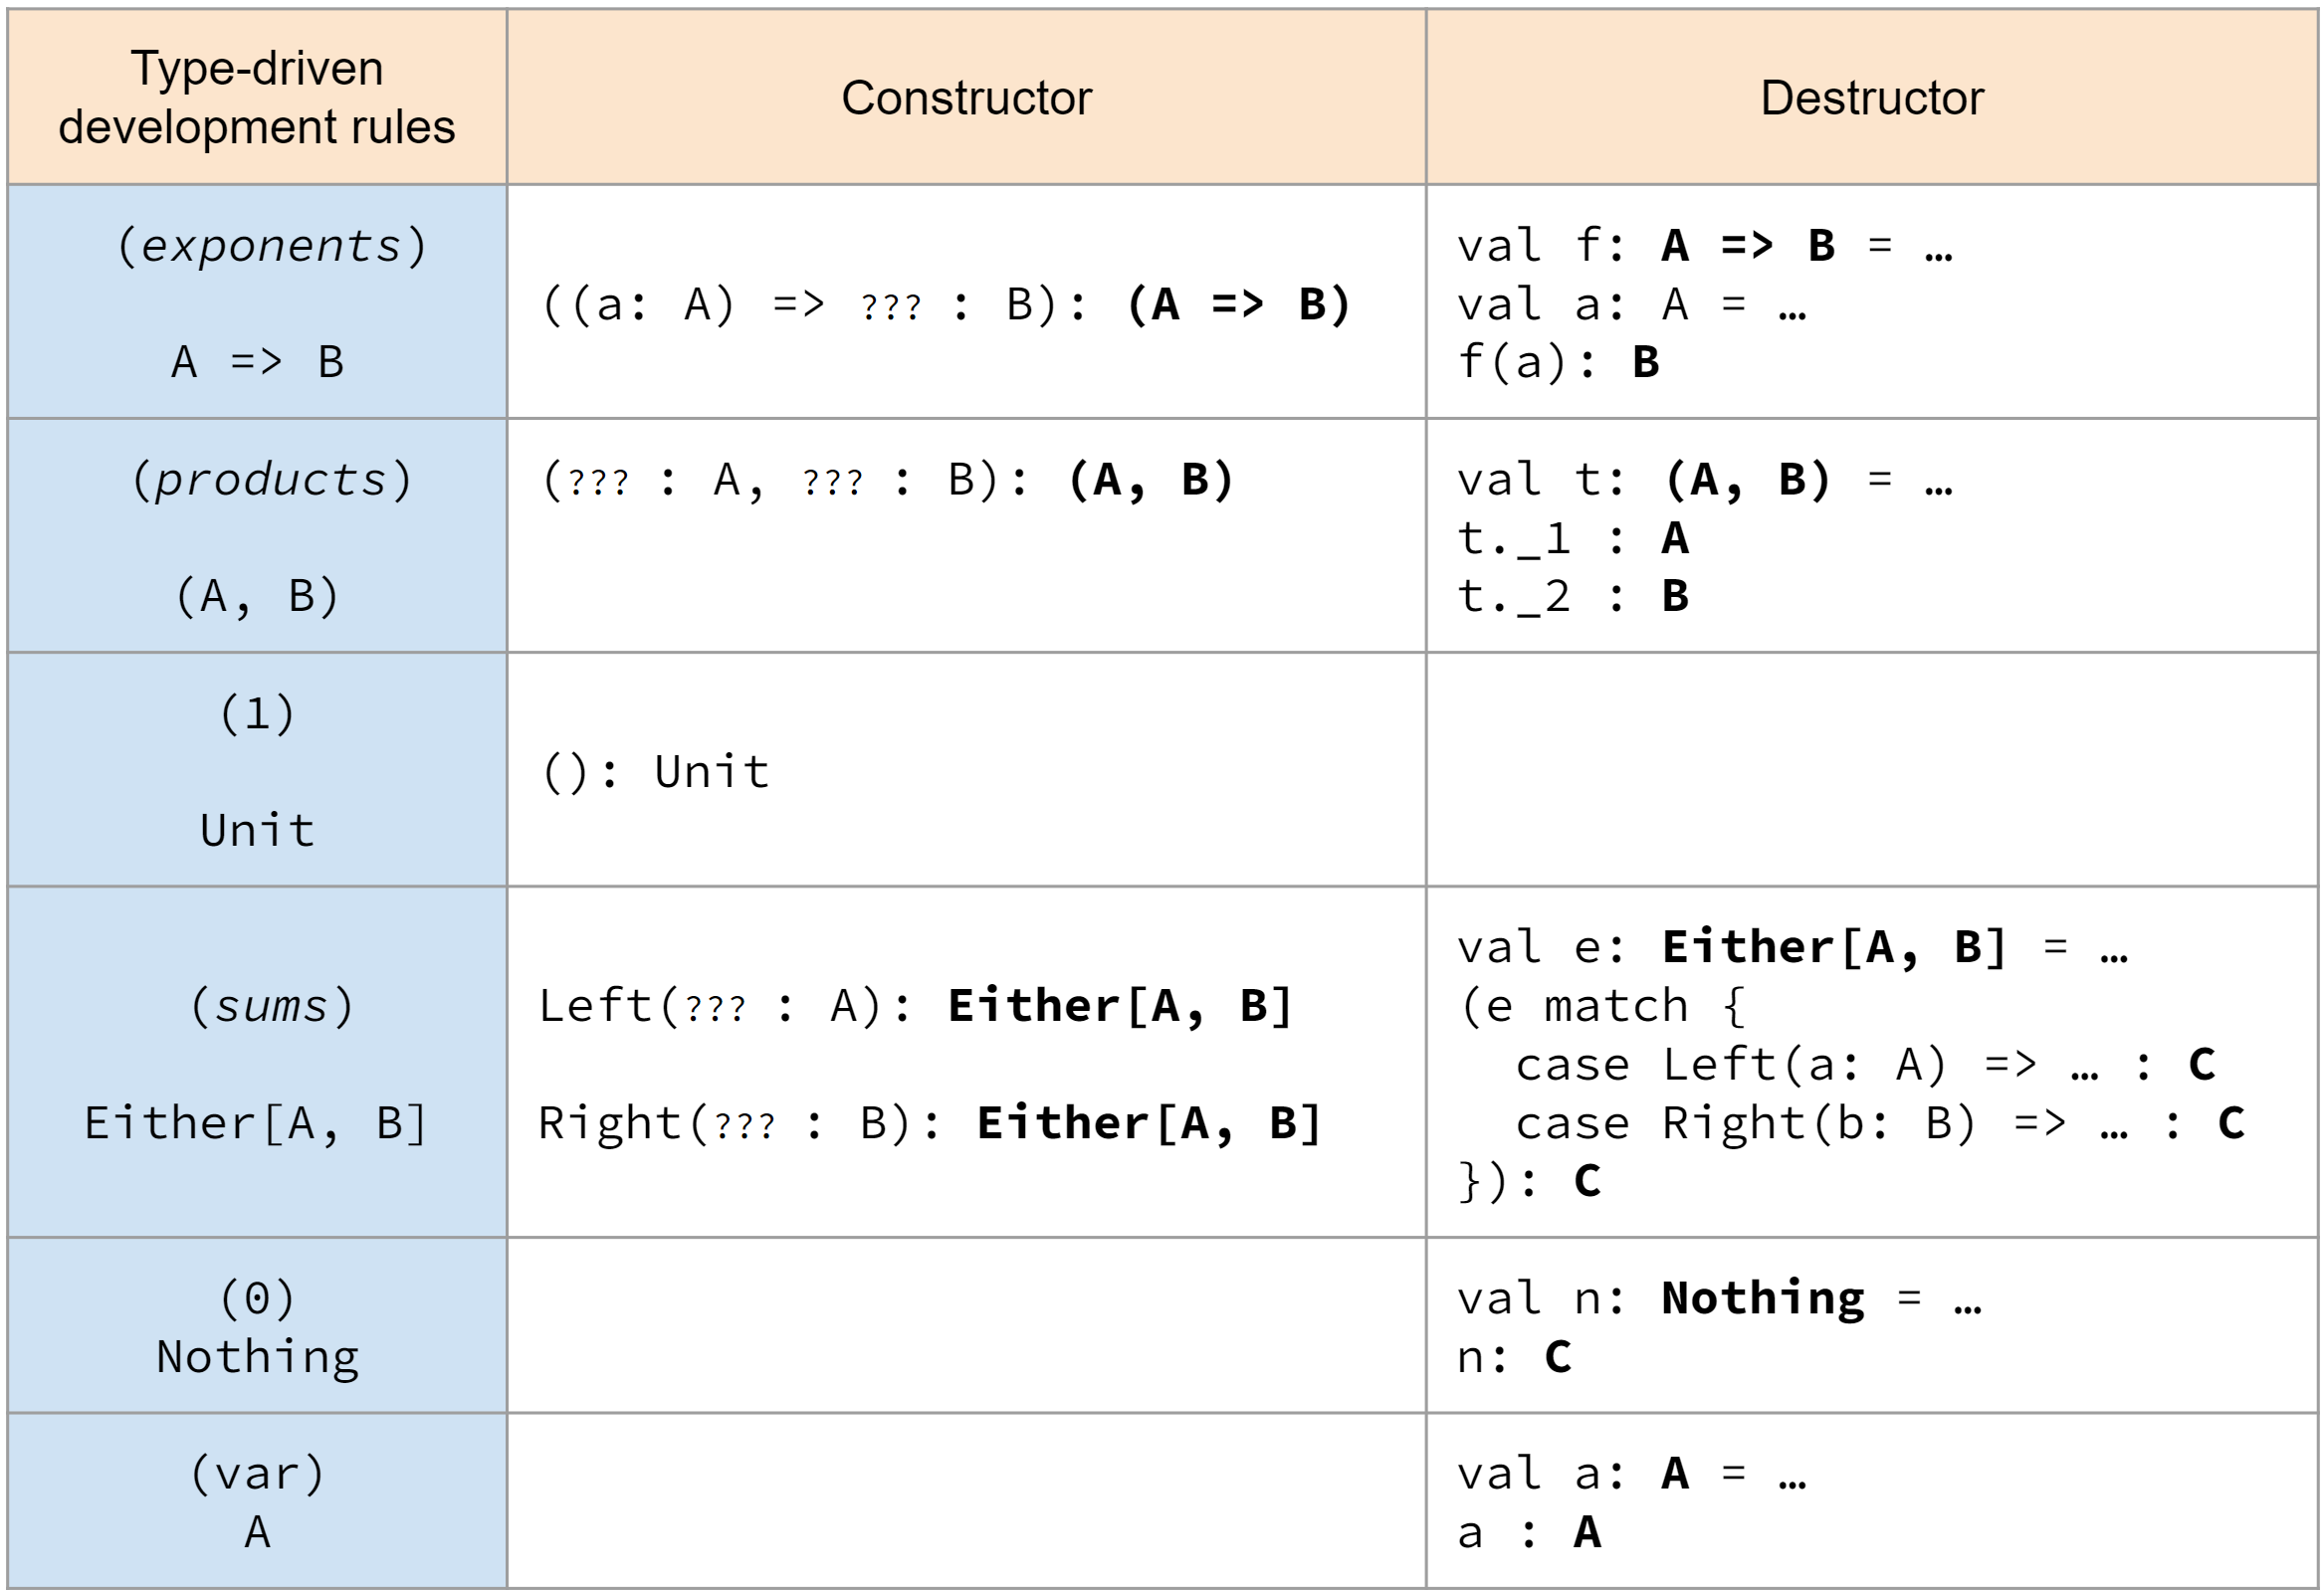

$$ 
\begin{array}{rcl}
(X,Nothing) & \cong & Nothing \\
\end{array}
$$



In [ ]:
// extends trait Isomorphic

$$ 
\begin{array}{rcl}
(X,Unit) & \cong & X \\
\end{array}
$$



In [ ]:
// extends trait Isomorphic

$$ 
\begin{array}{rcl}
(X,Y) & \cong & (Y,X) \\
\end{array}
$$



In [ ]:
// extends trait Isomorphic

$$ 
\begin{array}{rcl}
(X,(Y,Z)) & \cong & ((X,Y),Z) \\
\end{array}
$$



In [ ]:
// extends trait Isomorphic

$$ 
\begin{array}{rcl}
(X,Either[Y,Z]) & \cong & Either[(X,Y),(X,Z)] \\
\end{array}
$$



In [ ]:
// extends trait Isomorphic

# Ejercicio 7

Demuestra el siguiente isomorfismo entre tipos algebraicos de datos para todo tipo $X$: 

$(Unit+Unit)^X \cong Boolean^X$

In [ ]:
abstract class Isomorphic7[X] extends Isomorphic[X => Either[Unit, Unit], X => Boolean]

A continuación se muestran dos ejemplos de funciones para los casos de prueba de este isomorfismo cuando $X=Int$:

In [4]:
val f: Int => Either[Unit, Unit] = 
    i => if (i % 2 == 0) Left(()) else Right(())

val g: Int => Boolean = 
    _ % 2 == 0

f: Int => Either[Unit, Unit] = ammonite.$sess.cell4$Helper$$Lambda$3514/1475037471@207455cb
g: Int => Boolean = ammonite.$sess.cell4$Helper$$Lambda$3515/1473748731@9b7fe05

Para poder comparar estas funciones se deberán sobreescribir los métodos de comparación de la siguiente forma:

In [5]:
trait Equals7 extends Isomorphic[Int => Either[Unit, Unit], Int => Boolean]:
    
    override def equalA(f1: Int => Either[Unit, Unit], f2: Int => Either[Unit, Unit]): Boolean = 
        f1(0) == f2(0) && 
        f1(1) == f2(1) && 
        f1(2) == f2(2) && 
        f1(3) == f2(3)

    override def equalB(f1: Int => Boolean, f2: Int => Boolean): Boolean = 
        f1(0) == f2(0) && 
        f1(1) == f2(1) && 
        f1(2) == f2(2) && 
        f1(3) == f2(3)        

defined trait Equals7

#### Solution

In [6]:
class Isomorphic7[X] extends Isomorphic[X => Either[Unit, Unit], X => Boolean]:

    def from(a: X => Either[Unit, Unit]): X => Boolean = 
        x => a(x) match
            case Left(_) => false
            case Right(_) => true

    def to(b: X => Boolean): X => Either[Unit, Unit] = 
        x => if b(x) then Right(()) else Left(())

defined class Isomorphic7

In [7]:
run(TestIso(new Isomorphic7[Int] with Equals7)(f)(g))

cell3$Helper$TestIso:
law1
- should hold
law2
- should hold


#### Your solution

In [ ]:
// extends trait Isomorphic

# Ejercicio 8

Demuestra el siguiente isomorfismo entre tipos algebraicos de datos para todo tipo $X$, $Y$ y $Z$: 

$(Unit+Y+Z+Y*Z)^X \cong (Y+Unit)^X * (Z+Unit)^X$

In [ ]:
abstract class Isomorphic8[X, Y, Z] 
extends Isomorphic[X => Either[Unit, Either[Y, Either[Z, (Y, Z)]]], 
                   (X => Option[Y], X => Option[Z])]

A continuación se muestran dos objetos para las pruebas de este isomorfismo cuando $X=Int$, $Y=Unit$ y $Z=Unit$:

In [8]:
val f: Int => Either[Unit, Either[Unit, Either[Unit, (Unit, Unit)]]] = 
    i => if (i % 4 == 0) Left(()) 
         else if (i % 4 == 1) Right(Left(()))
         else if (i % 4 == 2) Right(Right(Left(())))
         else Right(Right(Right(((),()))))

val g: (Int => Option[Unit], Int => Option[Unit]) = 
    (i => if (i % 2 == 0) None else Some(()),
     i => if (i % 2 == 0) None else Some(()))

f: Int => Either[Unit, Either[Unit, Either[Unit, (Unit, Unit)]]] = ammonite.$sess.cell8$Helper$$Lambda$3773/1478526739@5a3d5251
g: (Int => Option[Unit], Int => Option[Unit]) = (
  ammonite.$sess.cell8$Helper$$Lambda$3774/1645661915@f479104,
  ammonite.$sess.cell8$Helper$$Lambda$3775/181429860@78dc1108
)

Asimismo, se deberán las siguientes redefiniciones de los métodos de comparación:

In [9]:
trait Equals8 extends Isomorphic[Int => Either[Unit, Either[Unit, Either[Unit, (Unit, Unit)]]], 
                                 (Int => Option[Unit], Int => Option[Unit])]:
    override def equalB(a1: (Int => Option[Unit], Int => Option[Unit]), 
                        a2: (Int => Option[Unit], Int => Option[Unit])): Boolean = 
        a1._1(0) == a2._1(0)
        a1._1(1) == a2._1(1)
        a1._1(2) == a2._1(2)
        a1._1(3) == a2._1(3)
        a1._2(0) == a2._2(0)
        a1._2(1) == a2._2(1)
        a1._2(2) == a2._2(2)
        a1._2(3) == a2._2(3)
    
    override def equalA(a1: Int => Either[Unit, Either[Unit, Either[Unit, (Unit, Unit)]]],
                        a2: Int => Either[Unit, Either[Unit, Either[Unit, (Unit, Unit)]]]): Boolean = 
        a1(0) == a2(0)
        a1(1) == a2(1)
        a1(2) == a2(2)
        a1(3) == a2(3)

defined trait Equals8

#### Your solution